# This script contains the following:

### 1. Importing libraries and data
### 2. Data cleaning
### 3. Data prep for regression analysis
### 4. Regression analysis
### 5. Results

### 1. Importing libraries and data

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# This option ensures that the graphs we create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [35]:
path = r'C:\Users\nang6\OneDrive\Bureau\Data Analytics\Data Immersion\Achievement 6'

In [36]:
df = pd.read_csv(os.path.join(path,'Open Data Source', 'Cleaned Data', 'WHR (2008-2022)_main_varia.csv'))

### 2. Data cleaning

In [37]:
df.columns

Index(['Unnamed: 0', 'Country', 'Happiness Score', 'GDP per Capita',
       'Social Support', 'Life Expectancy'],
      dtype='object')

In [38]:
# Drop Unnamed column

df = df.drop(columns = ['Unnamed: 0'])

In [39]:
df.head(20)

,Country,Happiness Score,GDP per Capita,Social Support,Life Expectancy
0,Afghanistan,3.724,7.350,0.451,50.500
1,Afghanistan,4.402,7.509,0.552,50.800
2,Afghanistan,4.758,7.614,0.539,51.100
3,Afghanistan,3.832,7.581,0.521,51.400
4,Afghanistan,3.783,7.661,0.521,51.700
5,Afghanistan,3.572,7.680,0.484,52.000
6,Afghanistan,3.131,7.671,0.526,52.300
7,Afghanistan,3.983,7.654,0.529,52.600
8,Afghanistan,4.220,7.650,0.559,52.925
9,Afghanistan,2.662,7.648,0.491,53.250


In [40]:
df.shape

(2121, 5)

##### Missing values

In [41]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Country            0
Happiness Score    0
GDP per Capita     0
Social Support     0
Life Expectancy    0
dtype: int64

##### Duplicates check

In [42]:
dups = df.duplicated()

In [43]:
dups.shape # No dups

(2121,)

##### Extreme values checks

C:\Users\nang6\AppData\Local\Temp\ipykernel_11076\3262941859.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Happiness Score'], bins=25) # Shows extreme values


<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

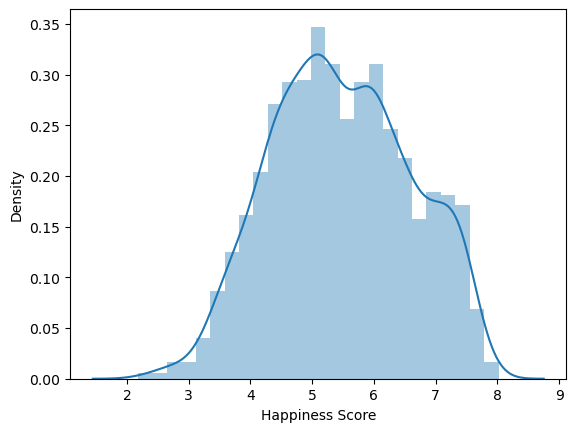

In [44]:
sns.distplot(df['Happiness Score'], bins=25) # Shows extreme values

# No outliers 

In [45]:
# Check the mean

df['Happiness Score'].mean()

5.47873644507307

In [46]:
# Check the median

df['Happiness Score'].median() 

5.428

In [47]:
# Check the max

df['Happiness Score'].max() 

8.019

In [48]:
# Descriptive Statistics for all variables

df.describe()

,Happiness Score,GDP per Capita,Social Support,Life Expectancy
count,2121.000000,2121.000000,2121.000000,2121.000000
mean,5.478736,9.375464,0.810880,63.295030
std,1.129524,1.153692,0.121271,6.909339
min,2.179000,5.527000,0.290000,6.720000
25%,4.637000,8.479000,0.744000,59.120000
50%,5.428000,9.499000,0.837000,65.050000
75%,6.313000,10.352000,0.906000,68.500000
max,8.019000,11.664000,0.987000,74.475000


### 3. Data prep for regression analysis 

### Hypothesis: Economic development is positively associated with overall happiness and well-being.

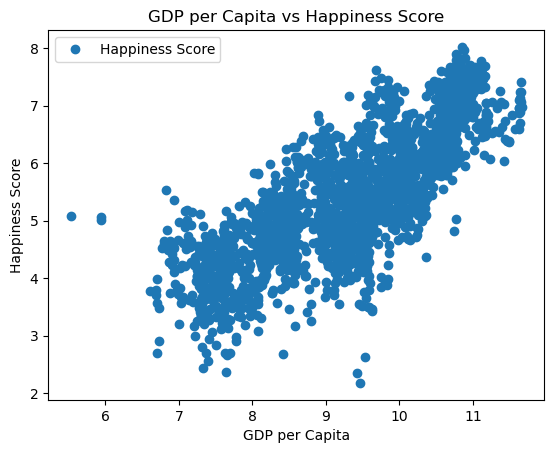

In [49]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'GDP per Capita', y='Happiness Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP per Capita vs Happiness Score')  
plt.xlabel('GDP per Capita')  
plt.ylabel('Happiness Score')  
plt.show()

In [50]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['GDP per Capita'].values.reshape(-1,1)
y = df['Happiness Score'].values.reshape(-1,1)

In [51]:
X

array([[7.35 ],
       [7.509],
       [7.614],
       ...,
       [7.596],
       [7.657],
       [7.67 ]])

In [52]:
y

array([[3.724],
       [4.402],
       [4.758],
       ...,
       [3.16 ],
       [3.155],
       [3.296]])

In [53]:
# Split data into a training set and a test set 
# (test_size = 0.3 argument within the function is specifying that the test set should comprise 30 percent of the data,
# thus making the training set 70 percent of the data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [54]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [55]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [56]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

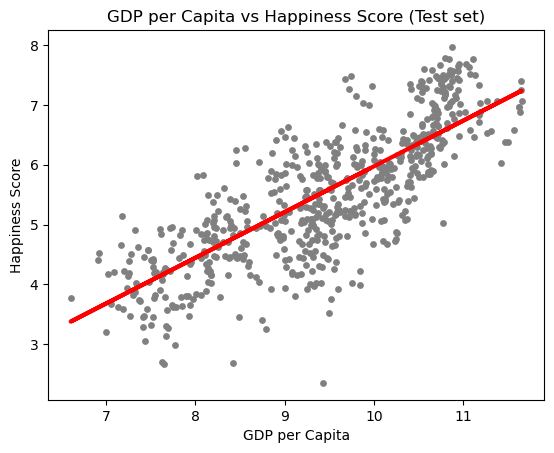

In [57]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per Capita vs Happiness Score (Test set)')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Happiness Score')
plot_test.show()

In [58]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [59]:
# Print the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression.coef_) 
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.76514789]]
Mean squared error:  0.45664700331503866
R2 score:  0.6303709406870309


##### Compare the predicted y values with the actual y values

In [60]:
y_predicted

array([[5.92758288],
       [5.814341  ],
       [4.25726503],
       [6.31398257],
       [6.64605676],
       [6.5764283 ],
       [6.38820192],
       [4.58015744],
       [4.56868023],
       [4.08434161],
       [6.61392054],
       [5.39886569],
       [5.40269143],
       [6.34382334],
       [5.44630486],
       [6.51598161],
       [4.01777374],
       [5.19227576],
       [5.51746361],
       [6.76541983],
       [4.54036975],
       [4.00170564],
       [5.43788823],
       [3.37734496],
       [6.55041327],
       [6.21986938],
       [4.23966663],
       [5.50216066],
       [4.39881739],
       [5.39044906],
       [4.5059381 ],
       [6.00486282],
       [5.6483039 ],
       [4.20217438],
       [5.50063036],
       [5.74318224],
       [6.05230199],
       [5.89391638],
       [4.07975072],
       [6.5924964 ],
       [5.65978112],
       [6.64529161],
       [6.38973221],
       [5.75772005],
       [5.95436306],
       [5.01170086],
       [4.79898974],
       [5.451

In [61]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.514,5.927583
1,5.178,5.814341
2,3.628,4.257265
3,6.484,6.313983
4,7.074,6.646057
5,7.117,6.576428
6,7.381,6.388202
7,4.162,4.580157
8,4.197,4.568680
9,4.298,4.084342


##### Compare how the regression fits the training set

In [62]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [63]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [64]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.76514789]]
Mean squared error:  0.49347995937831773
R2 score:  0.6181310432114262


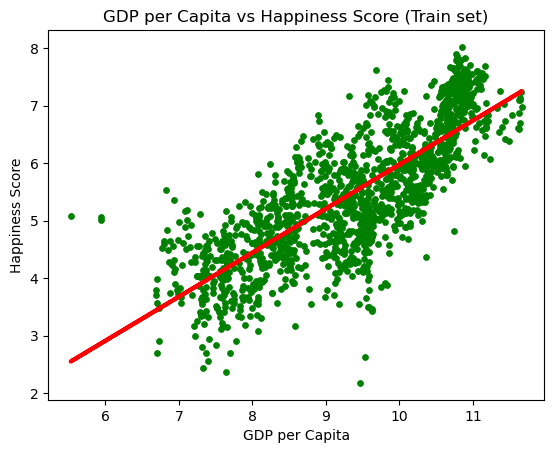

In [65]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP per Capita vs Happiness Score (Train set)')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Happiness Score')
plot_test.show()

# 5. Results: 

- A slope of 0.765 in both the testing and prediction models means that there is a positive association between economic development (as measured by GDP per Capita) and overall happiness and well-being (as measured by Happiness Score). 

Comparing the two sets of metrics, it appears that the model performs slightly better on the test set than on the predict set, based on the following observations:

- Mean squared error: The mean squared error is lower on the test set (0.457) than on the predict set (0.493). This means that, on average, the predicted values of Happiness Score are closer to the actual values in the test set.

- R2 score: The R2 score is higher on the test set (0.630) than on the predict set (0.618). This means that GDP per Capita explains a slightly higher proportion of the variance in Happiness Score in the test set compared to the predict set.

However, it is important to note that the difference in performance between the two sets is relatively small, therefore both models have moderate predictive power and suggest that GDP per Capita is a statistically significant predictor of Happiness Score, but other factors may also be important in explaining the variation in Happiness Score.

As the World Hapiness Report is based on self-reported data, which may be subject to social desirability bias or other forms of response bias,it may not capture the experiences and perspectives of marginalized or vulnerable populations, who may have different factors influencing their happiness and well-being. Plus, the WHR may not capture the full range of cultural, social, and environmental factors that could influence happiness and well-being, which may vary across countries and regions.